<a href="https://colab.research.google.com/github/zhulkhoirrifat/nuka-pos/blob/main/seeding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Library & Setup

In [ ]:
!pip install faker bcrypt

In [ ]:
from faker import Faker
import random
from datetime import datetime, timedelta
import pandas as pd
import os
import json
import bcrypt

In [ ]:
fake = Faker('id_ID')

## Generate Function

### Users

In [ ]:
role_distribution = {
    "Owner": 10,
    "Admin Toko": 50,
    "Kasir": 100,
    "Superadmin": 10
}

role_id_mapping = {
    "Owner": 2,
    "Admin Toko": 3,
    "Kasir": 4,
    "Superadmin": 1
}

In [ ]:
def generate_users(role_distribution, role_id_mapping):
    """ Membuat data dummy users
    Args:
        role_distribuiton(dict): Jumlah distribusi role pada user.
        role_id_mapping(dict): Id role pada tabel roles
    Return:
        users_data(list): Hasil generate data dummy users

    """
    users_data = []
    user_id = 1

    for role, jumlah in role_distribution.items():
        for _ in range(jumlah):

            name_male = fake.first_name_male() + " " + fake.last_name_male()
            name_female = fake.first_name_female() + " " + fake.last_name_female()

            email = fake.email()
            phone_number = fake.phone_number()
            plain_password = fake.password()
            password = bcrypt.hashpw(plain_password.encode('utf-8'), bcrypt.gensalt(10)).decode('utf-8')
            gender = random.choice(['MALE', 'FEMALE'])
            name = name_male if gender == 'MALE' else name_female
            image_url = fake.image_url()
            id_card = fake.image_url()
            npwp = fake.image_url()
            role_id = role_id_mapping[role]
            created_at = fake.date_time_this_decade()
            updated_at = fake.date_time_this_decade()

            users_data.append({
                'userId': user_id,
                'name': name,
                'email': email,
                'password': password,
                'gender': gender,
                'imageUrl': image_url,
                'phoneNumber': phone_number,
                'isEmailVerified': 1,
                'idCard': id_card,
                'npwp': npwp,
                'roleId': role_id,
                "createdAt": created_at,
                "updatedAt": updated_at
            })
            user_id += 1
    return users_data

In [ ]:
users_data = generate_users(role_distribution, role_id_mapping)
users_df = pd.DataFrame(users_data)
users_df.to_csv('users.csv', index=False)

In [ ]:
users_df

,userId,name,email,password,gender,imageUrl,phoneNumber,isEmailVerified,idCard,npwp,roleId,createdAt,updatedAt
0,1,Panji Lazuardi,halimbakda@example.org,$2b$10$RlmPurx9uym4y1GbbhMNEeFQA5gQkc7rkBSlgLt...,MALE,https://picsum.photos/103/643,0851040104,1,https://dummyimage.com/866x634,https://placekitten.com/415/525,2,2024-09-04 08:46:05.990133,2020-01-07 02:27:13.905075
1,2,Mulyanto Mahendra,karja59@example.net,$2b$10$4Ht48LC3Us5wKtnfJqWc3O7EvYZj1jrrtxCQ.7/...,MALE,https://picsum.photos/150/134,(0188) 628-0304,1,https://placekitten.com/299/966,https://dummyimage.com/544x928,2,2024-12-07 05:18:55.139898,2024-02-19 20:29:33.651035
2,3,Zalindra Pudjiastuti,rahimahraina@example.com,$2b$10$koX/QG5ecPFC7VPAhigHz.tnxmBl3ZjJEhOcEMY...,FEMALE,https://dummyimage.com/366x988,+62-103-722-8065,1,https://picsum.photos/356/880,https://dummyimage.com/47x845,2,2020-05-17 03:41:30.028358,2022-11-17 06:35:43.637121
3,4,Lala Mardhiyah,novasetiawan@example.net,$2b$10$U0XF308eAsoN9NbIKJLcvudelayz2g.Q2TrkUYN...,FEMALE,https://placekitten.com/813/539,(078) 845-7383,1,https://dummyimage.com/627x423,https://picsum.photos/460/721,2,2020-03-06 17:31:19.136346,2023-02-09 18:28:43.093981
4,5,Janet Usada,hwasita@example.org,$2b$10$yXbEGt.6aRtQ2vUxRk7X5u3wEbvuF70SiENnxhD...,FEMALE,https://dummyimage.com/602x620,+62-218-258-6906,1,https://picsum.photos/382/677,https://picsum.photos/138/453,2,2021-02-10 04:31:44.563740,2024-12-18 15:19:10.402234
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,166,Oman Haryanto,xprakasa@example.org,$2b$10$K7fkx0xxpE1TrJdZMayhc.NkOu/XwwrLNynXv3R...,MALE,https://picsum.photos/972/502,082 423 9785,1,https://picsum.photos/852/268,https://placekitten.com/765/653,1,2024-01-19 16:26:02.295139,2023-06-26 07:46:29.582583
166,167,Nilam Hasanah,wadijailani@example.org,$2b$10$E2nvOKlKavxPZ1SkW4w6nO6.ee4XBmncjJFc0Ji...,FEMALE,https://dummyimage.com/657x616,+62-013-754-8121,1,https://dummyimage.com/580x473,https://picsum.photos/477/334,1,2020-02-08 22:41:16.522739,2022-05-23 06:07:16.616775
167,168,Galih Wahyudin,azaleasitumorang@example.org,$2b$10$.KAFAcyvNpe.NKDD/TRwZ.wkOedwd0HsOlnWMCO...,MALE,https://picsum.photos/138/887,(0916) 923 4386,1,https://placekitten.com/957/862,https://dummyimage.com/7x30,1,2020-11-08 13:27:55.751558,2023-03-06 19:49:30.231780
168,169,Kambali Kurniawan,almiraharyanto@example.org,$2b$10$lcXw2Sbq4JQVD2glRdeCQewM9L8UVpp3GvVLWzP...,MALE,https://placekitten.com/932/908,+62-04-202-5647,1,https://dummyimage.com/931x768,https://dummyimage.com/951x456,1,2023-03-14 05:33:18.902335,2022-09-17 00:33:44.533715


### Tenants

In [ ]:
def generate_tenants(users_data):
    """ Membuat data dummy tenants.
    Args:
        users_data(list): Data users yang telah digenerate.

    Return:
        tenants_data(list): Hasil generate data dummy tenants.
    """
    tenants_data = []
    tenant_id = 1

    for i, user in enumerate(users_data):
        if user['roleId'] == 2:
            user_id = user['userId']
            created_at = fake.date_time_this_decade()
            updated_at = fake.date_time_this_decade()

            tenants_data.append({
                'tenantId': tenant_id,
                'userId': user_id,
                "createdAt": created_at,
                "updatedAt": updated_at
            })
            tenant_id += 1

    return tenants_data

In [ ]:
tenants_data = generate_tenants(users_data)
tenants_df = pd.DataFrame(tenants_data)
tenants_df.to_csv('tenants.csv', index=False)

In [ ]:
tenants_df

,tenantId,userId,createdAt,updatedAt
0,1,1,2024-03-12 00:25:47.267144,2021-02-11 23:59:18.167591
1,2,2,2024-05-15 14:47:43.773272,2020-03-14 02:25:55.511946
2,3,3,2022-07-29 01:15:26.783502,2020-04-03 14:12:57.536902
3,4,4,2021-10-25 17:56:16.455918,2021-05-08 05:10:14.372807
4,5,5,2025-02-01 10:21:36.985477,2023-08-24 12:10:38.846006
5,6,6,2022-04-23 08:30:06.946939,2022-10-28 02:02:58.162432
6,7,7,2020-08-16 03:24:02.970572,2024-08-14 00:44:38.891712
7,8,8,2020-08-03 09:00:04.214150,2025-01-30 23:22:56.230257
8,9,9,2023-04-15 01:10:05.993393,2022-04-10 14:32:46.675506
9,10,10,2021-05-13 07:09:43.482799,2020-09-15 15:42:27.492100


### Stores

In [ ]:
province_id = 64
city_id = 6471

districts = {
    "6471010": "Balikpapan Selatan",
    "6471011": "Balikpapan Kota",
    "6471020": "Balikpapan Timur",
    "6471030": "Balikpapan Utara",
    "6471040": "Balikpapan Tengah",
    "6471050": "Balikpapan Barat"
}

villages = {
    "6471010": [
        {"id": "6471010006", "name": "GUNUNG BAHAGIA"},
        {"id": "6471010007", "name": "SEPINGGAN"},
        {"id": "6471010008", "name": "DAMAI BARU"},
        {"id": "6471010009", "name": "DAMAI BAHAGIA"},
        {"id": "6471010010", "name": "SUNGAI NANGKA"},
        {"id": "6471010011", "name": "SEPINGGAN RAYA"},
        {"id": "6471010012", "name": "SEPINGGAN BARU"}
    ],
    "6471011": [
        {"id": "6471011001", "name": "PRAPATAN"},
        {"id": "6471011002", "name": "TELAGA SARI"},
        {"id": "6471011003", "name": "KLANDASAN ULU"},
        {"id": "6471011004", "name": "KLANDASAN ILIR"},
        {"id": "6471011005", "name": "DAMAI"}
    ],
    "6471020": [
        {"id": "6471020001", "name": "MANGGAR"},
        {"id": "6471020002", "name": "MANGGAR BARU"},
        {"id": "6471020003", "name": "LEMARU"},
        {"id": "6471020004", "name": "TERITIP"}
    ],
    "6471030": [
        {"id": "6471030001", "name": "MUARA RAPAK"},
        {"id": "6471030002", "name": "GUNUNG SAMARINDA"},
        {"id": "6471030003", "name": "BATU AMPAR"},
        {"id": "6471030004", "name": "KARANG JOANG"},
        {"id": "6471030005", "name": "GUNUNG SAMARINDA BARU"},
        {"id": "6471030006", "name": "GRAHA INDAH"}
    ],
    "6471040": [
        {"id": "6471040001", "name": "GUNUNG SARI ILIR"},
        {"id": "6471040002", "name": "GUNUNG SARI ULU"},
        {"id": "6471040003", "name": "MEKAR SARI"},
        {"id": "6471040004", "name": "KARANG REJO"},
        {"id": "6471040005", "name": "SUMBER REJO"},
        {"id": "6471040006", "name": "KARANG JATI"}
    ],
    "6471050": [
        {"id": "6471050001", "name": "BARU TENGAH"},
        {"id": "6471050002", "name": "MARGA SARI"},
        {"id": "6471050003", "name": "BARU ILIR"},
        {"id": "6471050004", "name": "MARGO MULYO"},
        {"id": "6471050005", "name": "BARU ULU"},
        {"id": "6471050006", "name": "KARIANGAU"}
    ]
}

In [ ]:
store_types_dict = {
    1: 'Makanan & Minuman',
    2: 'Fashion & Aksesoris',
    3: 'Perawatan Diri & Kecantikan',
    4: 'Elektronik, Gadget & Alat Musik',
    5: 'Perlengkapan Rumah Tangga & Dekorasi',
    6: 'Otomotif & Suku Cadang',
    7: 'Pertanian, Peternakan & Toko Hewan',
    8: 'Mainan, Hobi & Peralatan Outdoor',
    9: 'Peralatan Bayi & Anak',
    10: 'Minimarket & Kelontong',
    11: 'Produk Kesehatan',
    12: 'Pulsa & Layanan'
}

store_types_list = [{'storeTypeId': k, 'name': v} for k, v in store_types_dict.items()]

In [ ]:
def generate_stores(tenants_data, store_types_dict, total_stores=30):
    """ Membuat data dummy stores dengan distribusi acak.
    Args:
        tenants_data (list): Data tenant yang telah digenerate.
        store_types_dict (dict): Dictionary tipe dari toko yang akan di-generate.
        total_stores (int): Total toko yang akan digenerate.

    Return:
        stores_data (list): Hasil generate data dummy stores.
    """
    stores_data = []
    store_id = 1
    store_names = {}
    owner_ids = [tenant["userId"] for tenant in tenants_data]

    def generate_unique_store_name(base_name):
        if base_name not in store_names:
            store_names[base_name] = 1
            return base_name
        else:
            store_names[base_name] += 1
            return f'{base_name} Cabang {store_names[base_name]}'

    # Tentukan jumlah toko yang dimiliki setiap tenant secara acak
    store_distribution = {owner_id: random.randint(1, 5) for owner_id in owner_ids}  # Bisa memiliki 1 hingga 5 toko

    for owner_id, num_stores in store_distribution.items():
        for _ in range(num_stores):
            if len(stores_data) >= total_stores:
                break  # Berhenti jika jumlah toko sudah cukup

            store_type_id, store_type_name = random.choice(list(store_types_dict.items()))
            district_id = random.choice(list(districts.keys()))
            village = random.choice(villages[district_id])
            village_id = village['id']
            owner_name = next(user['name'] for user in users_data if user['userId'] == owner_id)
            base_name = f"{store_type_name} {owner_name.split()[1]}"
            name = generate_unique_store_name(base_name)

            stores_data.append({
                "storeId": store_id,
                "StoreCode": f'STR-{random.randint(100000000000,999999999999)}',
                "tenantId": owner_id,
                "name": name,
                "image": fake.image_url(),
                "address": fake.address(),
                "provinceId": province_id,
                "cityId": city_id,
                "districtId": district_id,
                "villageId": village_id,
                "storeTypeId": store_type_id,
                "postalCode": fake.postcode(),
                "description": fake.text(),
                "phoneNumber": fake.phone_number(),
                "logo": fake.image_url(),
                "npwpCompany": fake.image_url(),
                "permitCertificate": fake.image_url(),
                # "status": random.choice(['aktif', 'tidak_aktif']),
                "status": 'ACTIVE',
                "createdAt": fake.date_time_this_decade(),
                "updatedAt": fake.date_time_this_decade()
            })
            store_id += 1

    return stores_data

In [ ]:
stores_data = generate_stores(tenants_data, store_types_dict)
stores_df = pd.DataFrame(stores_data)
stores_df.to_csv('stores.csv', index=False)

In [ ]:
stores_df

,storeId,StoreCode,tenantId,name,image,address,provinceId,cityId,districtId,villageId,storeTypeId,postalCode,description,phoneNumber,logo,npwpCompany,permitCertificate,status,createdAt,updatedAt
0,1,STR-662821341466,1,Perawatan Diri & Kecantikan Lazuardi,https://picsum.photos/3/950,"Gg. Gegerkalong Hilir No. 151\nPalopo, Sulawes...",64,6471,6471011,6471011002,3,50664,Ducimus odio corrupti culpa perferendis animi ...,(0585) 972-5102,https://picsum.photos/836/521,https://placekitten.com/878/209,https://placekitten.com/460/763,ACTIVE,2020-07-21 09:02:01.350473,2020-06-29 02:49:44.576289
1,2,STR-795226950715,2,Perlengkapan Rumah Tangga & Dekorasi Mahendra,https://picsum.photos/348/782,"Gg. Siliwangi No. 126\nDumai, Kalimantan Timur...",64,6471,6471040,6471040006,5,11270,Tenetur impedit molestias aspernatur officia n...,+62 (568) 754-4941,https://placekitten.com/365/393,https://placekitten.com/53/20,https://placekitten.com/15/457,ACTIVE,2021-01-19 06:56:19.426313,2022-05-21 02:53:16.807649
2,3,STR-377802358642,2,Perlengkapan Rumah Tangga & Dekorasi Mahendra ...,https://picsum.photos/901/116,"Gang Ahmad Yani No. 1\nTangerang Selatan, KS 3...",64,6471,6471010,6471010012,5,72444,Aspernatur a dolore illum. Aut voluptates aspe...,084 891 6846,https://dummyimage.com/606x19,https://dummyimage.com/159x334,https://placekitten.com/576/675,ACTIVE,2023-09-16 12:54:24.431298,2022-01-15 23:28:17.447571
3,4,STR-720260441650,2,Makanan & Minuman Mahendra,https://placekitten.com/564/521,"Jalan Ahmad Dahlan No. 9\nBanda Aceh, Banten 7...",64,6471,6471010,6471010009,1,14660,Deserunt animi asperiores eos occaecati autem ...,(0530) 810-3424,https://dummyimage.com/504x5,https://placekitten.com/714/1000,https://picsum.photos/48/662,ACTIVE,2020-03-28 18:02:09.483802,2022-05-08 08:59:57.675243
4,5,STR-384138246320,2,"Elektronik, Gadget & Alat Musik Mahendra",https://dummyimage.com/172x532,"Jalan Sukajadi No. 1\nTebingtinggi, Jawa Timur...",64,6471,6471030,6471030006,4,12598,Hic aperiam voluptatibus quidem omnis illum. E...,087 178 6139,https://placekitten.com/754/716,https://dummyimage.com/633x737,https://dummyimage.com/517x72,ACTIVE,2020-12-26 04:14:01.552474,2021-02-23 03:14:09.665728
5,6,STR-760781880497,2,Makanan & Minuman Mahendra Cabang 2,https://dummyimage.com/274x537,"Jl. S. Parman No. 411\nSamarinda, JI 81867",64,6471,6471050,6471050002,1,63582,Enim reprehenderit rem magni. Esse voluptatum ...,+62 (030) 674 3706,https://picsum.photos/287/1004,https://placekitten.com/409/187,https://picsum.photos/131/118,ACTIVE,2022-02-16 03:46:09.938123,2023-01-14 15:12:07.079514
6,7,STR-945494160919,3,Pulsa & Layanan Pudjiastuti,https://placekitten.com/862/283,"Gang Cempaka No. 72\nMataram, Sumatera Selatan...",64,6471,6471040,6471040003,12,51920,Perspiciatis aut qui dignissimos unde nemo exp...,+62 (048) 310 9056,https://dummyimage.com/519x772,https://placekitten.com/440/497,https://dummyimage.com/985x216,ACTIVE,2020-12-12 02:58:36.203032,2022-03-17 10:25:12.904431
7,8,STR-571848040845,3,Perlengkapan Rumah Tangga & Dekorasi Pudjiastuti,https://dummyimage.com/587x8,"Gg. Ahmad Yani No. 80\nJambi, Sulawesi Selatan...",64,6471,6471020,6471020003,5,80149,Molestias quisquam aut reiciendis fugiat recus...,0863958611,https://dummyimage.com/945x560,https://dummyimage.com/40x484,https://dummyimage.com/777x490,ACTIVE,2020-09-01 03:10:38.597000,2021-04-17 12:06:37.352665
8,9,STR-778064734383,3,Perawatan Diri & Kecantikan Pudjiastuti,https://placekitten.com/1019/552,"Jl. Astana Anyar No. 7\nSingkawang, Jambi 60990",64,6471,6471040,6471040002,3,29905,Saepe distinctio fuga nisi eum. Eius explicabo...,+62 (0752) 101 7369,https://placekitten.com/77/35,https://picsum.photos/785/18,https://placekitten.com/993/256,ACTIVE,2021-06-02 03:46:50.152550,2022-09-13 13:21:00.809000
9,10,STR-870743062070,4,"Mainan, Hobi & Peralatan Outdoor Mardhiyah",https://picsum.photos/727/459,"Jl. Cihampelas No. 01\nBanda Aceh, AC 36006",64,6471,6471010,6471010009,8,19548,Nemo aliquid eaque iure dicta re

In [ ]:
check_pemilik = stores_df['tenantId'].value_counts()
print(check_pemilik)

tenantId
2     5
4     4
5     4
9     3
3     3
6     3
8     2
7     2
10    2
1     1
Name: count, dtype: int64


In [ ]:
jumlah_toko = stores_df[stores_df['tenantId'] == 3]

jumlah_toko

,storeId,StoreCode,tenantId,name,image,address,provinceId,cityId,districtId,villageId,storeTypeId,postalCode,description,phoneNumber,logo,npwpCompany,permitCertificate,status,createdAt,updatedAt
6,7,STR-945494160919,3,Pulsa & Layanan Pudjiastuti,https://placekitten.com/862/283,"Gang Cempaka No. 72\nMataram, Sumatera Selatan...",64,6471,6471040,6471040003,12,51920,Perspiciatis aut qui dignissimos unde nemo exp...,+62 (048) 310 9056,https://dummyimage.com/519x772,https://placekitten.com/440/497,https://dummyimage.com/985x216,ACTIVE,2020-12-12 02:58:36.203032,2022-03-17 10:25:12.904431
7,8,STR-571848040845,3,Perlengkapan Rumah Tangga & Dekorasi Pudjiastuti,https://dummyimage.com/587x8,"Gg. Ahmad Yani No. 80\nJambi, Sulawesi Selatan...",64,6471,6471020,6471020003,5,80149,Molestias quisquam aut reiciendis fugiat recus...,0863958611,https://dummyimage.com/945x560,https://dummyimage.com/40x484,https://dummyimage.com/777x490,ACTIVE,2020-09-01 03:10:38.597000,2021-04-17 12:06:37.352665
8,9,STR-778064734383,3,Perawatan Diri & Kecantikan Pudjiastuti,https://placekitten.com/1019/552,"Jl. Astana Anyar No. 7\nSingkawang, Jambi 60990",64,6471,6471040,6471040002,3,29905,Saepe distinctio fuga nisi eum. Eius explicabo...,+62 (0752) 101 7369,https://placekitten.com/77/35,https://picsum.photos/785/18,https://placekitten.com/993/256,ACTIVE,2021-06-02 03:46:50.152550,2022-09-13 13:21:00.809000


In [ ]:
check_store = stores_df[stores_df['storeId'] == 21]
check_store

,storeId,StoreCode,tenantId,name,image,address,provinceId,cityId,districtId,villageId,storeTypeId,postalCode,description,phoneNumber,logo,npwpCompany,permitCertificate,status,createdAt,updatedAt
20,21,STR-438817783751,7,"Mainan, Hobi & Peralatan Outdoor Kuswandari",https://dummyimage.com/31x403,"Jalan Gegerkalong Hilir No. 50\nBima, ST 92189",64,6471,6471030,6471030003,8,87319,Harum itaque aut iure. Facilis quis alias dign...,(0326) 792-1815,https://picsum.photos/406/141,https://dummyimage.com/336x106,https://dummyimage.com/687x965,ACTIVE,2023-09-13 01:38:21.545678,2023-06-26 02:15:47.634113


### Store Users

In [ ]:
def generate_store_users(users_data, stores_data):
    """ Membuat data dummy store_users.
    Args:
        users_data(list): Data users yang telah digenerate.
        stores_data(list): Data stores yang telah digenerate.

    Return:
        store_users_data(list): Hasil generate data dummy store_users.
    """

    store_users_data = []
    store_user_id = 1

    for user in users_data:
        if user['roleId'] in [3, 4]:
            store_id = random.choice(stores_data)['storeId']
            store_users_data.append({
                'storeUserId': store_user_id,
                'userId': user['userId'],
                'storeId': store_id,
                "createdAt": fake.date_time_this_decade(),
                "updatedAt": fake.date_time_this_decade()
            })
            store_user_id += 1

        elif user["roleId"] == 2:
            for store in stores_data:
                if store["tenantId"] == user["userId"]:
                    store_users_data.append({
                        "storeUserId": store_user_id,
                        "userId": user["userId"],
                        "storeId": store["storeId"],
                        "createdAt": fake.date_time_this_decade(),
                        "updatedAt": fake.date_time_this_decade()
                    })
                    store_user_id += 1
    return store_users_data

In [ ]:
store_users_data = generate_store_users(users_data, stores_data)
store_users_df = pd.DataFrame(store_users_data)
store_users_df.to_csv('store_users.csv', index=False)

In [ ]:
store_users_df

,storeUserId,userId,storeId,createdAt,updatedAt
0,1,1,1,2021-01-13 09:23:01.650792,2021-03-14 11:54:08.884894
1,2,2,2,2023-05-13 14:34:24.148384,2024-07-30 07:51:06.944856
2,3,2,3,2022-12-29 07:07:14.298547,2024-08-12 08:13:13.641592
3,4,2,4,2022-10-21 22:21:37.006017,2022-06-23 19:56:36.848943
4,5,2,5,2023-05-30 18:35:15.489317,2020-03-22 18:01:32.389125
...,...,...,...,...,...
174,175,156,27,2024-03-24 08:14:24.540312,2021-08-19 04:44:31.929290
175,176,157,12,2024-10-20 08:56:22.346643,2023-02-17 05:05:26.135953
176,177,158,3,2022-05-16 13:18:08.841366,2022-06-07 04:48:29.071295
177,178,159,7,2020-12-20 20:55:07.639421,2020-04-13 22:59:46.745325


In [ ]:
store_users_df['storeId'].value_counts()

,count
storeId,
8,10
4,9
27,9
19,9
21,9
26,8
5,8
11,8
29,8


In [ ]:
check_toko = store_users_df[store_users_df['userId'] == 73]
check_toko

,storeUserId,userId,storeId,createdAt,updatedAt
91,92,73,11,2020-09-25 07:32:24.582873,2020-01-18 20:02:58.161342


In [ ]:
check_toko = store_users_df[store_users_df['storeId'] == 21]
check_toko

,storeUserId,userId,storeId,createdAt,updatedAt
20,21,7,21,2023-02-02 11:57:44.826976,2020-06-15 05:24:35.918896
49,50,31,21,2024-12-04 21:17:51.578264,2024-04-19 22:11:55.775502
57,58,39,21,2024-12-26 16:41:42.271103,2024-05-20 20:14:09.345585
71,72,53,21,2023-06-16 02:33:28.203490,2021-03-01 23:46:38.699656
113,114,95,21,2020-08-26 17:34:55.720592,2024-03-03 05:24:00.096834
145,146,127,21,2023-03-11 02:10:34.763420,2021-07-29 07:06:04.050356
153,154,135,21,2020-02-25 04:41:36.653205,2025-02-12 21:17:26.640573
155,156,137,21,2021-05-26 05:55:51.275652,2025-02-20 08:05:36.945834
169,170,151,21,2020-09-06 00:03:50.387025,2021-02-19 11:28:58.763282


In [ ]:
check_karyawan = users_df[users_df['userId'] == 73]
check_karyawan

,userId,name,email,password,gender,imageUrl,phoneNumber,isEmailVerified,idCard,npwp,roleId,createdAt,updatedAt
72,73,Zamira Mulyani,jabalmangunsong@example.org,$2b$10$VsfN6OOU.VJKY9ClIX8wYOBfAOd2xrDYprGjb6N...,FEMALE,https://placekitten.com/241/977,+62 (41) 813-7992,1,https://dummyimage.com/218x117,https://placekitten.com/643/62,4,2020-07-27 20:54:35.594415,2021-10-13 05:21:05.175341


### Shifts

In [ ]:
shift_days = [
    'SUNDAY', 'MONDAY', 'TUESDAY', 'WEDNESDAY', 'THRUSDAY', 'FRIDAY', 'SATURDAY'
]

start_date = datetime(2024, 9, 10)  # 6 bulan sebelum 10 Maret 2025
end_date = datetime(2025, 3, 10)

shift_times = [(7, 15), (15, 23), (23, 7)]  # Format: (start_hour, end_hour)

In [ ]:
def get_week_starts(start, end):
    week_starts = []
    current = start
    while current < end:
        week_starts.append(current)
        current += timedelta(days=7)
    return week_starts

In [ ]:
def generate_shifts(store_users_data, users_data):
    shift_data = []
    shift_id = 1
    week_starts = get_week_starts(start_date, end_date)

    # Buat mapping user_id ke role_id untuk efisiensi
    user_role_map = {user["userId"]: user["roleId"] for user in users_data}

    for store_user in store_users_data:
        user_id = store_user["userId"]
        role_id = user_role_map.get(user_id)

        # Hanya generate shift untuk kasir (role_id = 4)
        if role_id != 4:
            continue

        user_store_id = store_user["storeUserId"]

        # Untuk setiap minggu dalam 6 bulan
        for week_start in week_starts:
            # Pilih 1 hari libur secara acak
            off_day = random.choice(shift_days)
            # Hari kerja adalah semua hari kecuali hari libur
            work_days = [day for day in shift_days if day != off_day]

            for work_day in work_days:
                days_ahead = shift_days.index(work_day) - week_start.weekday()
                if days_ahead < 0:
                    days_ahead += 7

                shift_date = week_start + timedelta(days=days_ahead)
                if shift_date > end_date:
                    break

                start_hour, end_hour = random.choice(shift_times)
                shift_start = datetime.combine(shift_date, datetime.min.time()) + timedelta(hours=start_hour)
                shift_end = shift_start + timedelta(hours=(end_hour - start_hour))

                if end_hour < start_hour:  # Shift malam
                    shift_end += timedelta(days=1)

                shift_data.append({
                    "shiftId": shift_id,
                    "shiftStart": shift_start,
                    "shiftEnd": shift_end,
                    "day": work_day,
                    "storeUserId": user_store_id,
                    "createdAt": fake.date_time_between(start_date, end_date),
                    "updatedAt": fake.date_time_between(start_date, end_date)
                })
                shift_id += 1

    return shift_data

In [ ]:
shifts_data = generate_shifts(store_users_data, users_data)
shifts_df = pd.DataFrame(shifts_data)
shifts_df.to_csv('shifts.csv', index=False)

In [ ]:
shifts_df

,shiftId,shiftStart,shiftEnd,day,storeUserId,createdAt,updatedAt
0,1,2024-09-16 15:00:00,2024-09-16 23:00:00,SUNDAY,80,2024-12-31 13:48:04.629381,2024-12-05 16:25:06.890699
1,2,2024-09-10 07:00:00,2024-09-10 15:00:00,MONDAY,80,2025-01-17 05:01:35.489660,2025-02-13 16:12:49.567404
2,3,2024-09-11 07:00:00,2024-09-11 15:00:00,TUESDAY,80,2024-12-14 18:42:26.775514,2024-11-03 02:25:06.490582
3,4,2024-09-13 15:00:00,2024-09-13 23:00:00,THRUSDAY,80,2024-10-10 15:33:08.292901,2024-11-15 14:04:32.790964
4,5,2024-09-14 23:00:00,2024-09-15 07:00:00,FRIDAY,80,2024-09-28 17:27:27.631000,2024-10-02 23:52:33.721004
...,...,...,...,...,...,...,...
15595,15596,2025-03-04 07:00:00,2025-03-04 15:00:00,MONDAY,179,2024-12-19 17:29:24.777558,2024-12-31 22:15:13.680575
15596,15597,2025-03-05 23:00:00,2025-03-06 07:00:00,TUESDAY,179,2025-02-07 20:02:39.751369,2024-09-16 22:09:59.353321
15597,15598,2025-03-07 23:00:00,2025-03-08 07:00:00,THRUSDAY,179,2024-12-10 06:46:52.077743,2025-01-06 17:16:10.836273
15598,15599,2025-03-08 23:00:00,2025-03-09 07:00:00,FRIDAY,179,2025-02-07 22:17:52.343049,2024-10-09 21:02:06.887530


In [ ]:
shifts_df[shifts_df['storeUserId'] == 93].value_counts().sum()

np.int64(156)

In [ ]:
shifts_df[shifts_df['storeUserId'] == 93]

,shiftId,shiftStart,shiftEnd,day,storeUserId,createdAt,updatedAt
2028,2029,2024-09-16 15:00:00,2024-09-16 23:00:00,SUNDAY,93,2025-02-01 10:39:59.721148,2025-02-10 04:43:08.041164
2029,2030,2024-09-10 15:00:00,2024-09-10 23:00:00,MONDAY,93,2025-01-01 03:48:22.790256,2024-12-07 16:29:22.526894
2030,2031,2024-09-11 15:00:00,2024-09-11 23:00:00,TUESDAY,93,2025-01-26 12:32:10.623170,2024-11-18 19:41:36.894528
2031,2032,2024-09-13 23:00:00,2024-09-14 07:00:00,THRUSDAY,93,2024-12-02 16:02:54.186149,2025-01-03 16:43:53.296411
2032,2033,2024-09-14 07:00:00,2024-09-14 15:00:00,FRIDAY,93,2025-01-07 02:40:01.026304,2024-12-10 08:34:04.777847
...,...,...,...,...,...,...,...
2179,2180,2025-03-05 15:00:00,2025-03-05 23:00:00,TUESDAY,93,2024-10-22 07:35:20.507908,2025-02-16 00:55:47.676137
2180,2181,2025-03-06 23:00:00,2025-03-07 07:00:00,WEDNESDAY,93,2024-11-17 10:24:56.932249,2024-09-15 12:29:15.126556
2181,2182,2025-03-07 07:00:00,2025-03-07 15:00:00,THRUSDAY,93,2024-12-27 15:26:40.547900,2024-10-05 19:41:58.431865
2182,2183,2025-03-08 07:00:00,2025-03-08 15:00:00,FRIDAY,93,2024-11-17 21:14:44.682272,2025-01-07 00:57:11.753233


In [ ]:
shifts_df.value_counts(shifts_df['storeUserId'])

,count
storeUserId,
80,156
81,156
82,156
83,156
84,156
...,...
175,156
176,156
177,156


In [ ]:
check_karyawan = shifts_df[shifts_df['storeUserId'] == 93]
check_karyawan

,shiftId,shiftStart,shiftEnd,day,storeUserId,createdAt,updatedAt
2028,2029,2024-09-16 15:00:00,2024-09-16 23:00:00,SUNDAY,93,2025-02-01 10:39:59.721148,2025-02-10 04:43:08.041164
2029,2030,2024-09-10 15:00:00,2024-09-10 23:00:00,MONDAY,93,2025-01-01 03:48:22.790256,2024-12-07 16:29:22.526894
2030,2031,2024-09-11 15:00:00,2024-09-11 23:00:00,TUESDAY,93,2025-01-26 12:32:10.623170,2024-11-18 19:41:36.894528
2031,2032,2024-09-13 23:00:00,2024-09-14 07:00:00,THRUSDAY,93,2024-12-02 16:02:54.186149,2025-01-03 16:43:53.296411
2032,2033,2024-09-14 07:00:00,2024-09-14 15:00:00,FRIDAY,93,2025-01-07 02:40:01.026304,2024-12-10 08:34:04.777847
...,...,...,...,...,...,...,...
2179,2180,2025-03-05 15:00:00,2025-03-05 23:00:00,TUESDAY,93,2024-10-22 07:35:20.507908,2025-02-16 00:55:47.676137
2180,2181,2025-03-06 23:00:00,2025-03-07 07:00:00,WEDNESDAY,93,2024-11-17 10:24:56.932249,2024-09-15 12:29:15.126556
2181,2182,2025-03-07 07:00:00,2025-03-07 15:00:00,THRUSDAY,93,2024-12-27 15:26:40.547900,2024-10-05 19:41:58.431865
2182,2183,2025-03-08 07:00:00,2025-03-08 15:00:00,FRIDAY,93,2024-11-17 21:14:44.682272,2025-01-07 00:57:11.753233


### Customers

In [ ]:
def generate_customers(users_data, stores_data, store_users_data, total_customers=15000):
    customers_data = []
    customer_id = 1

    cashiers = {user["userId"] for user in users_data if user.get("roleId") == 4}

    store_users_mapping = {}
    for su in store_users_data:
        if su["userId"] in cashiers:
            store_users_mapping.setdefault(su["storeId"], []).append(su)

    for _ in range(total_customers):
        store = random.choice(stores_data)
        store_id = store['storeId']

        if store_id in store_users_mapping:
            store_user = random.choice(store_users_mapping[store_id])
            user_id = store_user['userId']
        else:
            continue

        name = fake.name()
        phone = fake.phone_number()
        choices = ['ACTIVE', 'INACTIVE']
        weights = [0.8, 0.2]
        status = random.choices(choices, weights=weights, k=1)[0]
        created_at = fake.date_time_this_decade()
        updated_at = fake.date_time_this_decade()

        customers_data.append({
            "customerId": customer_id,
            "storeId": store_id,
            "userId": user_id,
            "name": fake.first_name() + " " + fake.last_name(),
            "phoneNumber": phone,
            "status": status,
            "createdAt": created_at,
            "updatedAt": updated_at
        })
        customer_id += 1

    return customers_data


In [ ]:
customers_data = generate_customers(users_data, stores_data, store_users_data)
customers_df = pd.DataFrame(customers_data)
customers_df.to_csv('customers.csv', index=False)

In [ ]:
customers_df['status'].value_counts()

,count
status,
ACTIVE,11575
INACTIVE,2889


In [ ]:
customers_df[customers_df['userId'] == 73]

,customerId,storeId,userId,name,phoneNumber,status,createdAt,updatedAt
269,270,11,73,Tomi Nugroho,+62 (0603) 016-3612,ACTIVE,2022-11-16 09:59:00.666115,2021-11-17 19:00:17.432333
342,343,11,73,Azalea Hidayat,+62-372-191-8855,INACTIVE,2023-02-27 17:53:12.839526,2023-04-02 23:21:32.704826
436,437,11,73,Kasusra Waluyo,+62 (000) 561-8596,INACTIVE,2022-06-27 09:28:13.672327,2024-09-03 07:13:52.883383
449,450,11,73,Asirwada Lestari,(0730) 501 1716,ACTIVE,2021-07-26 15:41:37.558566,2024-03-25 02:56:42.150505
547,548,11,73,Edward Prasetya,+62 (47) 934-4135,ACTIVE,2022-07-04 07:12:19.854824,2023-03-13 06:39:16.306172
...,...,...,...,...,...,...,...,...
14115,14116,11,73,Kiandra Narpati,(032) 197 6304,INACTIVE,2021-05-16 12:59:17.006834,2022-05-27 20:34:47.775304
14175,14176,11,73,Tami Anggraini,+62 (01) 695 7408,ACTIVE,2022-07-01 12:18:37.415800,2020-04-22 02:03:31.132142
14226,14227,11,73,Salwa Widodo,(024) 170 7501,ACTIVE,2024-05-12 16:21:25.090702,2025-01-19 18:47:21.200190
14277,14278,11,73,Gara Yolanda,+62 (0082) 920 8253,INACTIVE,2023-10-26 15:22:59.308213,2020-07-20 14:37:37.987821


In [ ]:
customers_df['userId'].value_counts()

,count
userId,
155,531
75,284
158,282
66,273
97,271
...,...
79,81
87,80
115,79


### Category

In [ ]:
product_category_fnb_stores = {
    1: "Daging Beku",
    2: "Makanan Beku",
    3: "Makanan Instant",
    4: "Dessert",
    5: "Ice Cream",
    6: "Menu Sarapan",
    7: "Minuman",
    8: "Nasi Goreng",
    9: "Mie Goreng",
    10: "Kwetiaw",
    11: "Snack",
    12: "Menu Kremes"
}

product_category_fashion_stores = {
    1: "Pakaian Pria",
    2: "Pakaian Wanita",
    3: "Sepatu",
    4: "Sandal",
    5: "Tas",
    6: "Pakaian Bayi",
    7: "Aksesoris",
    8: "Kacamata",
    9: "Jam Tangan",
    10: "Pakaian Anak-anak",
    11: "Pakaian Bayi"
}

product_category_cosmetics_stores = {
    1: "Sabun Wajah",
    2: "Toner",
    3: "Serum",
    4: "Moistruizer",
    5: "Sunscreen Wajah",
    6: "Foundation",
    7: "Bedak",
    8: "Lipstik",
    9: "Maskara",
    10: "Shampoo",
    11: "Conditioner",
    12: "Pomade",
    13: "Parfum",
    14: "Deodoran",
    15: "Sisir",
    16: "Hairdreyer",
    17: "Catokan",
    18: "Hand Cream"
}

product_category_baby_child_stores = {
    1: "Popok Bayi",
    2: "Perlengkapan Mandi",
    3: "Pakaian Bayi",
    4: "Pakaian Anak-anak",
    5: "Susu Formula",
    6: "Makanan Bayi",
    7: "Mainan Edukasi",
    8: "Perlengkapan Makan Bayi",
    9: "Stroller",
    10: "Car Seat"
}

product_category_electronic_stores = {
    1: "Smartphone",
    2: "Laptop",
    3: "Proyektor",
    4: "Kamera",
    5: "Drone",
    6: "Mouse",
    7: "Keyboard",
    8: "Cooling Pad",
    9: "Charger Smartphone",
    10: "Power Bank",
    11: "Earphone",
    12: "Controller",
    13: "Headset",
    14: "Microphone",
    15: "TWS"
}

product_category_household_stores = {
    1: "Peralatan Dapur",
    2: "Alat Kebersihan",
    3: "Dekorasi Rumah",
    4: "Perabotan Kecil",
    5: "Gorden, Karpet & Keset",
    6: "Tempat Penyimpanan"
}

product_category_automotive_stores = {
    1: "Oli dan Cairan Kendaraan",
    2: "Aksesoris Mobil",
    3: "Aksesoris Motor",
    4: "Lampu Kendaraan",
    5: "Ban dan Sparepart",
    6: "Alat Servis Kendaraan",
    7: "Jasa",
}

product_category_algiculture = {
    1: "Pupuk dan Obat Tanaman",
    2: "Benih dan Bibit Tanaman",
    3: "Pakan Ternak",
    4: "Kandang dan Aksesoris Hewan",
    5: "Makanan Hewan Peliharaan",
    6: "Obat dan Vitamin Hewan"
}

product_category_hobby_stores = {
    1: "Mainan Anak",
    2: "Peralatan Olahraga",
    3: "Alat Pancing",
    4: "Teleskop",
    5: "Peralatan Camping",
    6: "Action Figure & Koleksi Hobi"
}

product_category_minimarket_stores = {
    1: "Sembako",
    2: "Makanan Ringan",
    3: "Minuman Kemasan",
    4: "Rokok",
    5: "Kebutuhan sehari-hari",
    6: "Peralatan Mandi & Kebersihan",
    7: "Obat-obatan Ringan",
    8: "Alat Tulis Kantor"
}

product_category_pharmacy_stores = {
    1: "Obat Bebas & Suplemen",
    2: "Alat Kesehatan",
    3: "Minuman Kesehatan",
    4: "Perawatan Luka",
    5: "Produk Kebersihan",
    6: "Alat Bantu Kesehatan"
}

product_category_credit_stores = {
    1: "Pulsa & Paket Data",
    2: "Token Listrik PLN",
    3: "Voucher Game",
    4: "Pembayaran Tagihan",
    5: "E-money & Top-up saldo"
}

category_mapping = {
        "Makanan & Minuman": product_category_fnb_stores,
        "Fashion & Aksesoris": product_category_fashion_stores,
        "Perawatan Diri & Kecantikan": product_category_cosmetics_stores,
        "Elektronik, Gadget & Alat Musik": product_category_electronic_stores,
        "Peralatan Bayi & Anak": product_category_baby_child_stores,
        "Minimarket & Kelontong": product_category_minimarket_stores,
        "Produk Kesehatan": product_category_pharmacy_stores,
        "Pulsa & Layanan": product_category_credit_stores,
        "Perlengkapan Rumah Tangga & Dekorasi": product_category_household_stores,
        "Otomotif & Suku Cadang": product_category_automotive_stores,
        "Pertanian, Peternakan & Toko Hewan": product_category_algiculture,
        "Mainan, Hobi & Peralatan Outdoor": product_category_hobby_stores
    }

In [ ]:
def generate_categories(category_mapping):
    categories = []
    category_id_counter = 1
    for i, category_dict in category_mapping.items():
        for i, category_name in category_dict.items():
            categories.append({
                "categoryId": category_id_counter,
                "name": category_name,
                "createdAt": fake.date_time_this_decade(),
                "updatedAt": fake.date_time_this_decade()
            })
            category_id_counter += 1
    return categories

In [ ]:
categories_data = generate_categories(category_mapping)
categories_df = pd.DataFrame(categories_data)
categories_df.to_csv('categories.csv', index=False)

In [ ]:
categories_df

,categoryId,name,createdAt,updatedAt
0,1,Daging Beku,2020-07-11 14:58:46.494392,2020-11-30 09:17:53.757592
1,2,Makanan Beku,2024-08-28 01:06:08.645650,2021-03-03 01:08:28.241387
2,3,Makanan Instant,2021-09-22 09:42:04.610231,2024-03-27 05:08:00.034771
3,4,Dessert,2024-10-31 22:50:53.398576,2020-11-23 13:59:43.006039
4,5,Ice Cream,2021-12-02 12:32:22.375864,2023-03-22 13:52:46.457080
...,...,...,...,...
105,106,Peralatan Olahraga,2023-11-30 01:32:46.625454,2020-08-14 08:49:57.259983
106,107,Alat Pancing,2023-07-14 20:40:24.343812,2024-09-26 00:37:08.464428
107,108,Teleskop,2020-10-20 14:19:28.142742,2022-08-23 04:40:09.288732
108,109,Peralatan Camping,2022-09-28 16:04:24.150474,2023-02-28 03:33:40.938362


### Products

In [ ]:
def generate_products(stores_data, category_mapping, store_types_dict, categories_data):
    products_data = []
    product_id = 1

    for store in stores_data:
        store_type_id = store['storeTypeId']
        if store_type_id in store_types_dict:
            store_type_name = store_types_dict[store_type_id]

            if store_type_name in category_mapping:
                product_categories = category_mapping[store_type_name]

                store_products = random.randint(6, 15)
                for _ in range(store_products):
                    category_name = random.choice(list(product_categories.values()))
                    categories_data = pd.DataFrame(categories_data)
                    category_row = categories_data[categories_data['name'] == category_name]

                    if not category_row.empty:
                        category_id = category_row['categoryId'].values[0]
                    else:
                        category_id = None

                    product_name = f'{category_name} {product_id}'

                    products_data.append({
                        'productId': product_id,
                        'productCode': 'PRD-' + str(random.randint(100000000000, 999999999999)),
                        'serialNumber': random.randint(100000000000, 999999999999),
                        'storeId': store['storeId'],
                        'categoryId': category_id,
                        'name': product_name,
                        'basePrice': random.randint(1000, 50000),
                        'discount': random.randint(1, 100),
                        'stockProduct': random.randint (1,70),
                        'imageUrl': fake.image_url(),
                        'createdAt': fake.date_time_this_decade(),
                        'updatedAt': fake.date_time_this_decade()
                    })
                    product_id += 1
    return products_data

In [ ]:
products_data = generate_products(stores_data, category_mapping, store_types_dict, categories_data)
products_df = pd.DataFrame(products_data)
products_df.to_csv('products.csv', index=False)

In [ ]:
products_df

,productId,productCode,serialNumber,storeId,categoryId,name,basePrice,discount,stockProduct,imageUrl,createdAt,updatedAt
0,1,PRD-782811857141,361667723081,1,33,Shampoo 1,39622,74,20,https://placekitten.com/270/116,2021-07-16 17:16:32.512215,2021-08-21 10:43:41.517289
1,2,PRD-561597997943,687059907748,1,28,Sunscreen Wajah 2,23817,98,46,https://placekitten.com/15/289,2021-07-30 19:23:19.708828,2023-08-15 00:08:44.491144
2,3,PRD-441669190514,646518578772,1,27,Moistruizer 3,23405,14,48,https://placekitten.com/257/435,2021-07-18 06:40:25.408211,2022-10-31 17:30:36.485482
3,4,PRD-185699043596,316373185895,1,26,Serum 4,14950,45,26,https://placekitten.com/564/636,2023-02-06 02:52:12.142235,2020-08-28 13:54:02.299233
4,5,PRD-852259386253,311549395700,1,29,Foundation 5,42282,60,8,https://picsum.photos/241/891,2020-12-19 05:20:18.940211,2024-01-24 01:12:25.673805
...,...,...,...,...,...,...,...,...,...,...,...,...
302,303,PRD-375753852364,121520353861,29,110,Action Figure & Koleksi Hobi 303,14624,25,34,https://dummyimage.com/185x979,2023-08-09 10:23:52.479625,2020-05-06 12:08:48.193107
303,304,PRD-345836129390,547582919876,29,107,Alat Pancing 304,7309,61,39,https://placekitten.com/879/121,2024-07-19 04:41:57.327465,2024-08-15 11:51:34.359179
304,305,PRD-262949759780,710106631458,29,107,Alat Pancing 305,21153,56,39,https://placekitten.com/403/705,2021-02-28 13:19:41.841580,2024-08-18 23:01:52.579533
305,306,PRD-467471346190,980047668328,29,107,Alat Pancing 306,4949,74,46,https://placekitten.com/897/638,2025-01-11 03:40:22.990409,2022-03-06 16:22:19.975621


In [ ]:
products_df[products_df['storeId'] == 21]

,productId,productCode,serialNumber,storeId,categoryId,name,basePrice,discount,stockProduct,imageUrl,createdAt,updatedAt
207,208,PRD-615094324151,770142415937,21,108,Teleskop 208,40960,45,65,https://dummyimage.com/443x912,2021-07-21 13:59:18.657430,2021-10-17 02:40:51.651424
208,209,PRD-995705401677,705869609602,21,105,Mainan Anak 209,11611,78,19,https://placekitten.com/466/415,2023-04-02 08:56:33.740150,2024-10-07 17:33:05.269543
209,210,PRD-894692790998,388502006694,21,108,Teleskop 210,22554,62,13,https://dummyimage.com/999x264,2020-09-28 11:23:14.540753,2021-05-11 23:56:11.395320
210,211,PRD-615658872725,131785575374,21,109,Peralatan Camping 211,35240,77,37,https://dummyimage.com/921x948,2023-02-21 11:27:52.064329,2020-11-20 14:08:59.996921
211,212,PRD-867184013096,579960106839,21,110,Action Figure & Koleksi Hobi 212,19676,43,57,https://picsum.photos/191/139,2021-02-07 00:51:01.309722,2024-10-09 04:08:22.199399
212,213,PRD-364101995606,411192498207,21,105,Mainan Anak 213,15280,25,46,https://picsum.photos/825/113,2023-07-19 17:27:37.620049,2024-04-05 03:38:58.626848
213,214,PRD-536978408452,497690611968,21,105,Mainan Anak 214,22093,95,23,https://dummyimage.com/248x665,2021-09-21 06:43:12.387686,2024-01-20 01:31:23.975735
214,215,PRD-543841964400,864477165624,21,105,Mainan Anak 215,23107,49,20,https://placekitten.com/342/707,2024-04-07 22:13:11.590632,2022-08-13 06:04:47.772834
215,216,PRD-427782657803,981308036125,21,107,Alat Pancing 216,1206,71,19,https://placekitten.com/108/725,2023-07-08 15:11:36.095619,2023-10-02 14:40:24.577890
216,217,PRD-869284445771,454575721875,21,107,Alat Pancing 217,15994,72,46,https://picsum.photos/275/305,2021-02-26 06:05:18.974519,2023-05-06 08:09:30.050482


### Variant Types

In [ ]:
variant_types = {
    "FNB": ["Rasa", "Ukuran", "Kemasan"],
    "Fashion": ["Warna", "Ukuran", "Bahan"],
    "Cosmetics": ["Tipe", "Kandungan", "Aroma"],
    "Baby & Child": ["Ukuran", "Bahan", "Merek"],
    "Electronics": ["Warna", "Kapasitas", "Tipe"],
    "Household": ["Warna", "Ukuran", "Material"],
    "Automotive": ["Jenis", "Warna", "Merek"],
    "Agriculture": ["Jenis", "Berat", "Kemasan"],
    "Hobby": ["Jenis", "Ukuran", "Merek"],
    "Minimarket": ["Ukuran", "Rasa", "Kemasan"],
    "Pharmacy": ["Dosis", "Kemasan", "Tipe"],
    "Credit": ["Nominal", "Operator", "Jenis"]
}

In [ ]:
def generate_variant_types():
    variant_types_data = []
    variant_types_id = 1

    for variant_type in set([vt for sublist in variant_types.values() for vt in sublist]):
        variant_types_data.append({
            'variantTypeId': variant_types_id,
            'name': variant_type,
            'createdAt': fake.date_time_this_decade(),
            'updatedAt': fake.date_time_this_decade()
        })
        variant_types_id += 1
    return variant_types_data

In [ ]:
variant_types_data = generate_variant_types()
variant_types_df = pd.DataFrame(variant_types_data)
variant_types_df.to_csv('variant_types.csv', index=False)

In [ ]:
variant_types_df

,variantTypeId,name,createdAt,updatedAt
0,1,Bahan,2022-07-31 11:10:40.984938,2023-11-28 10:05:30.762583
1,2,Aroma,2020-05-10 14:40:30.230951,2022-04-19 12:38:58.545887
2,3,Merek,2022-05-26 06:08:13.680468,2022-06-10 02:17:57.444058
3,4,Jenis,2020-09-10 09:21:51.822163,2021-09-30 09:55:52.374610
4,5,Operator,2022-08-29 23:15:21.864160,2022-03-01 14:16:52.609967
5,6,Material,2021-04-03 12:02:24.198443,2021-05-11 16:58:51.664771
6,7,Ukuran,2020-04-02 12:19:49.369646,2023-10-16 06:09:33.691813
7,8,Kandungan,2025-02-18 14:17:38.808803,2023-02-13 10:34:17.246552
8,9,Berat,2021-04-06 15:00:34.841786,2020-09-07 07:40:25.434630
9,10,Warna,2023-07-13 23:57:07.222657,2024-10-19 19:22:28.533440


### Variant Options

In [ ]:
variant_options = {
    "Rasa": ["Manis", "Asin", "Pedas", "Gurih"],
    "Ukuran": ["S", "M", "L", "XL"],
    "Kemasan": ["Plastik", "Karton", "Botol", "Kaleng"],
    "Warna": ["Merah", "Biru", "Hitam", "Putih", "Hijau"],
    "Bahan": ["Katun", "Denim", "Linen", "Sutra"],
    "Tipe": ["Cair", "Padat", "Spray"],
    "Kapasitas": ["16GB", "32GB", "64GB", "128GB"],
    "Material": ["Kayu", "Besi", "Plastik", "Aluminium"],
    "Merek": ["Brand A", "Brand B", "Brand C"],
    "Berat": ["250gr", "500gr", "1kg", "5kg"],
    "Dosis": ["100mg", "250mg", "500mg"],
    "Nominal": ["10.000", "25.000", "50.000", "100.000"],
    "Operator": ["Telkomsel", "XL", "Indosat", "Tri"],
    "Jenis": ["Elektrik", "Manual", "Digital", "Hybrid"],
    "Kandungan": ["Vitamin C", "Kolagen", "Hyaluronic Acid"],
    "Aroma": ["Floral", "Buah", "Vanilla"]
}

In [ ]:
def generate_variant_options(variant_types_data):
    variant_options_data = []
    variant_option_id = 1

    for variant_type_name, options in variant_options.items():
        variant_type_id = None
        for variant_type in variant_types_data:
            if variant_type['name'] == variant_type_name:
                variant_type_id = variant_type['variantTypeId']
                break

        if variant_type_id is None:
            print(f'Tidak ditemukan variant_type untuk {variant_type_name}')
            continue

        for option_name in options:
            price = random.randint(1000, 50000)
            choices = ['ACTIVE', 'INACTIVE']
            weights = [0.8, 0.2]
            status = random.choices(choices, weights=weights, k=1)[0]
            variant_options_data.append({
                'variantOptionId': variant_option_id,
                'variantTypeId': variant_type_id,
                'name': option_name,
                'price': price,
                'status': status,
                'createdAt': fake.date_time_this_decade(),
                'updatedAt': fake.date_time_this_decade()
            })
            variant_option_id += 1

    return variant_options_data

In [ ]:
variant_options_data = generate_variant_options(variant_types_data)
variant_options_df = pd.DataFrame(variant_options_data)
variant_options_df.to_csv('variant_options.csv', index=False)

In [ ]:
variant_options_df

,variantOptionId,variantTypeId,name,price,status,createdAt,updatedAt
0,1,12,Manis,24737,ACTIVE,2020-07-30 08:55:58.225024,2024-02-15 07:15:36.127363
1,2,12,Asin,38089,ACTIVE,2024-02-08 20:36:44.280513,2021-05-29 21:35:47.975802
2,3,12,Pedas,38454,ACTIVE,2022-10-28 20:03:00.687449,2022-09-12 15:41:57.763468
3,4,12,Gurih,13023,ACTIVE,2024-01-26 00:39:02.265056,2020-01-13 13:22:24.649269
4,5,7,S,9114,ACTIVE,2021-11-08 03:10:51.261425,2024-08-29 22:36:09.371687
5,6,7,M,5267,ACTIVE,2022-11-18 19:03:51.963708,2021-03-15 19:03:46.594526
6,7,7,L,15334,ACTIVE,2022-02-09 04:40:49.051846,2020-11-24 20:54:04.404330
7,8,7,XL,6870,INACTIVE,2024-03-21 19:04:34.406939,2021-03-31 16:23:40.614911
8,9,15,Plastik,30858,INACTIVE,2024-10-24 17:11:33.686719,2024-12-13 06:18:07.010081
9,10,15,Karton,28140,ACTIVE,2020-01-06 04:56:55.833649,2024-03-20 09:00:50.693257


### Variants dan Variant Option Variants

In [ ]:
category_to_variant = {
    "Makanan & Minuman": "FNB",
    "Fashion & Aksesoris": "Fashion",
    "Perawatan Diri & Kecantikan": "Cosmetics",
    "Elektronik, Gadget & Alat Musik": "Electronics",
    "Peralatan Bayi & Anak": "Baby & Child",
    "Minimarket & Kelontong": "Minimarket",
    "Produk Kesehatan": "Pharmacy",
    "Pulsa & Layanan": "Credit",
    "Perlengkapan Rumah Tangga & Dekorasi": "Household",
    "Otomotif & Suku Cadang": "Automotive",
    "Pertanian, Peternakan & Toko Hewan": "Agriculture",
    "Mainan, Hobi & Peralatan Outdoor": "Hobby"
}

In [ ]:
import pandas as pd
import random

# Asumsi fake dari Faker sudah diimpor
# from faker import Faker
# fake = Faker()

def find_main_category(product_category):
    for main_category, sub_categories in category_mapping.items():
        if product_category in sub_categories.values():
            return main_category
    return None

def generate_variants(products_df, categories_df, variant_types, variant_options, variant_options_data):
    variants_data = []
    variant_option_variants_data = []
    variant_id = 1
    variant_option_variant_id = 1

    # Pastikan variant_options_data dalam bentuk list
    variant_options_data = list(variant_options_data)

    product_category_merge = products_df.merge(categories_df, on='categoryId', how='left')

    for _, row in product_category_merge.iterrows():
        product_id = row['productId']
        category_name = row['name_y']

        print(f"Product ID: {product_id}, Category: {category_name}")

        main_category = find_main_category(category_name)
        if not main_category or main_category not in category_to_variant:
            print(f"  -> Main category tidak ditemukan atau tidak ada di category_to_variant: {main_category}")
            continue

        variant_category = category_to_variant[main_category]
        if variant_category not in variant_types:
            print(f"  -> Variant category tidak ada di variant_types: {variant_category}")
            continue

        possible_variant_types = variant_types[variant_category]
        num_variants = random.randint(1, len(possible_variant_types))  # 1 atau lebih tipe varian
        selected_variant_types = random.sample(possible_variant_types, num_variants)

        print(f"  -> Variant Category: {variant_category}, Possible Types: {possible_variant_types}, Selected Types: {selected_variant_types}")

        # Tambahkan entri ke variants_data untuk setiap tipe varian yang dipilih
        for variant_type in selected_variant_types:
            variants_data.append({
                'variantId': variant_id,
                'productId': product_id,
                'createdAt': fake.date_time_this_decade(),
                'updatedAt': fake.date_time_this_decade()
            })

        # Reset daftar opsi untuk debugging
        added_options = []

        for variant_type in selected_variant_types:
            if variant_type in variant_options:
                print(f"    -> Variant Type: {variant_type}, Available Options: {variant_options[variant_type]}")
                for option_name in variant_options[variant_type]:
                    # Cari opsi yang cocok di variant_options_data
                    matching_option = next((opt for opt in variant_options_data if opt['name'] == option_name), None)
                    if matching_option:
                        variant_option_variants_data.append({
                            'variantOptionVariantId': variant_option_variant_id,
                            'variantId': variant_id,
                            'variantOptionId': matching_option['variantOptionId'],
                            'createdAt': fake.date_time_this_decade(),
                            'updatedAt': fake.date_time_this_decade()
                        })
                        added_options.append(option_name)
                        print(f"      -> Added Option: {option_name} (variantOptionId: {matching_option['variantOptionId']})")
                        variant_option_variant_id += 1
                    else:
                        print(f"      -> Option {option_name} tidak ditemukan di variant_options_data")
            else:
                print(f"    -> Variant Type {variant_type} tidak ada di variant_options")

        # Debugging: Cek semua opsi yang ditambahkan untuk variant ini
        print(f"  -> Total Options Added for variantId {variant_id}: {len(added_options)} - {added_options}")

        variant_id += 1

    return variants_data, variant_option_variants_data

In [ ]:
variants_data, variant_option_variants_data = generate_variants(products_df, categories_df, variant_types, variant_options, variant_options_data)
variants_df = pd.DataFrame(variants_data)
variant_option_variants_df = pd.DataFrame(variant_option_variants_data)
variants_df.to_csv('variants.csv', index=False)
variant_option_variants_df.to_csv('variant_option_variants.csv', index=False)

Product ID: 1, Category: Shampoo
  -> Variant Category: Cosmetics, Possible Types: ['Tipe', 'Kandungan', 'Aroma'], Selected Types: ['Kandungan', 'Tipe', 'Aroma']
    -> Variant Type: Kandungan, Available Options: ['Vitamin C', 'Kolagen', 'Hyaluronic Acid']
      -> Added Option: Vitamin C (variantOptionId: 55)
      -> Added Option: Kolagen (variantOptionId: 56)
      -> Added Option: Hyaluronic Acid (variantOptionId: 57)
    -> Variant Type: Tipe, Available Options: ['Cair', 'Padat', 'Spray']
      -> Added Option: Cair (variantOptionId: 22)
      -> Added Option: Padat (variantOptionId: 23)
      -> Added Option: Spray (variantOptionId: 24)
    -> Variant Type: Aroma, Available Options: ['Floral', 'Buah', 'Vanilla']
      -> Added Option: Floral (variantOptionId: 58)
      -> Added Option: Buah (variantOptionId: 59)
      -> Added Option: Vanilla (variantOptionId: 60)
  -> Total Options Added for variantId 1: 9 - ['Vitamin C', 'Kolagen', 'Hyaluronic Acid', 'Cair', 'Padat', 'Spray', '

In [ ]:
variants_df

,variantId,productId,createdAt,updatedAt
0,1,1,2024-01-16 09:16:29.855567,2023-02-08 05:06:03.524669
1,1,1,2024-02-12 17:56:56.358027,2022-09-17 02:07:43.362209
2,1,1,2024-03-26 08:11:11.425484,2022-09-21 14:29:11.575872
3,2,2,2023-07-24 08:04:26.248554,2024-05-12 08:15:37.991722
4,3,3,2022-03-31 18:19:44.216583,2021-05-30 07:14:28.634527
...,...,...,...,...
600,304,304,2020-10-07 01:42:33.435669,2023-11-20 03:18:49.283164
601,305,305,2021-07-15 10:07:50.193311,2020-04-17 23:13:22.077271
602,306,306,2021-08-30 03:52:43.657792,2020-10-02 13:24:48.720676
603,307,307,2021-02-02 00:04:51.072680,2021-11-10 17:16:13.092896


In [ ]:
variant_option_variants_df

,variantOptionVariantId,variantId,variantOptionId,createdAt,updatedAt
0,1,1,55,2020-11-09 08:20:29.342965,2021-06-06 12:05:05.905602
1,2,1,56,2023-04-03 04:50:18.856035,2024-12-02 12:25:59.705556
2,3,1,57,2020-07-07 22:43:10.505259,2020-02-20 03:46:35.574708
3,4,1,22,2024-10-22 02:12:14.407700,2023-09-29 05:19:06.373984
4,5,1,23,2021-06-05 21:07:45.926139,2024-01-27 17:26:23.993232
...,...,...,...,...,...
2359,2360,307,7,2020-11-15 01:25:23.047941,2021-09-18 04:46:31.030658
2360,2361,307,8,2023-10-17 04:22:56.633815,2024-07-18 20:40:23.667709
2361,2362,307,33,2023-12-23 05:45:43.081069,2024-06-14 05:21:17.423202
2362,2363,307,34,2023-07-13 19:51:00.498831,2021-06-18 20:39:19.837135


In [ ]:
variant_option_variants_df[variant_option_variants_df['variantId'] == 243]

,variantOptionVariantId,variantId,variantOptionId,createdAt,updatedAt
1845,1846,243,18,2021-08-18 18:24:32.985368,2024-06-28 23:52:47.671862
1846,1847,243,19,2024-12-26 19:30:12.065342,2023-09-24 07:59:17.161505
1847,1848,243,20,2023-10-02 20:00:38.455439,2022-05-24 22:39:16.838104
1848,1849,243,21,2022-02-23 04:33:06.512021,2024-09-03 01:47:36.824153
1849,1850,243,5,2022-05-29 22:27:32.836174,2023-08-16 16:26:42.942246
1850,1851,243,6,2021-11-25 13:58:42.877413,2024-07-19 05:03:02.877808
1851,1852,243,7,2020-11-26 02:35:21.805101,2025-03-16 06:00:54.699352
1852,1853,243,8,2020-02-19 03:05:38.882653,2023-02-13 13:42:29.296940
1853,1854,243,33,2023-10-14 13:19:01.796044,2021-12-31 08:44:30.351686
1854,1855,243,34,2023-10-14 21:34:53.059946,2024-03-03 13:47:55.635506


### Payment Methods

In [ ]:
payment_methods = {
    'BRI': 'YES',
    'Cash': 'NO',
    'QRIS': 'YES',
    'DANA': 'YES',
    'OVO': 'YES',
    'Mandiri': 'YES',
    'BNI': 'YES'
}

In [ ]:
def generate_payment_methods():
    payment_methods_data = []
    payment_method_id = 1

    for name, is_cash in payment_methods.items():
        payment_methods_data.append({
            'paymentMethodId': payment_method_id,
            'name': name,
            'image': fake.image_url(),
            'isCash': is_cash,
            'createdAt': fake.date_time_this_decade(),
            'updatedAt': fake.date_time_this_decade()
        })
        payment_method_id += 1

    return payment_methods_data

In [ ]:
payment_methods_data = generate_payment_methods()
payment_methods_df = pd.DataFrame(payment_methods_data)
payment_methods_df.to_csv('payment_methods.csv', index=False)

In [ ]:
payment_methods_df

,paymentMethodId,name,image,isCash,createdAt,updatedAt
0,1,BRI,https://placekitten.com/916/121,YES,2020-10-24 19:23:43.133925,2024-11-03 00:03:40.405488
1,2,Cash,https://picsum.photos/714/378,NO,2024-05-16 01:35:57.534475,2021-04-09 18:02:40.298519
2,3,QRIS,https://dummyimage.com/798x770,YES,2022-10-17 06:15:37.257294,2023-06-15 02:22:37.820713
3,4,DANA,https://picsum.photos/868/618,YES,2021-07-01 15:41:00.126628,2020-08-11 03:38:53.823261
4,5,OVO,https://placekitten.com/1010/487,YES,2021-03-29 22:09:01.866001,2020-06-19 07:13:44.718328
5,6,Mandiri,https://picsum.photos/400/166,YES,2020-10-23 20:18:48.638148,2020-09-10 18:50:01.728390
6,7,BNI,https://picsum.photos/265/96,YES,2022-11-19 06:14:46.542029,2021-03-19 08:58:50.889280


### Transactions

In [ ]:
taxes = {
    'PPn': 12,
    'PPh': 0.5,
    'Pajak Daerah': 2
}

In [ ]:
def weighted_transactions_fnb_time(start_date, end_date):
    hour_weights = {8:10, 9:10, 12:15, 13: 14, 17: 20, 18: 20, 19: 15, 20:10}
    all_hour = list(range(24))
    hour_probability = [hour_weights.get(h, random.randint(1, 5)) for h in all_hour]
    day_weights = {0: 5, 1: 5, 2: 5, 3: 5, 4: 5, 5: 10, 6: 15}
    month_weights = {}

    delta = (end_date - start_date).days
    random_day = start_date + timedelta(days=random.randint(0, delta))

    weighted_day = random.choices(list(day_weights.keys()), weights=list(day_weights.values()), k=1)[0]
    random_day = random_day + timedelta(days=(weighted_day - random_day.weekday()) % 7)
    print(all_hour)
    print(hour_probability)

    hour = random.choices(all_hour, weights=hour_probability, k=1)[0]
    minute = random.randint(0, 59)
    second = random.randint(0,59)

    return random_day.replace(hour=hour, minute=minute, second=second)

In [ ]:
def generate_transactions(
        shifts_df,
        customers_df,
        products_df,
        variants_df,
        variant_options_df,
        variant_option_variants_df,
        payment_methods_df,
        store_users_df,
        users_df,
        store_ids=21,
        max_transactions=10000
    ):
    transactions_data = []
    transaction_details_data = []
    transaction_id = 1
    transaction_detail_id = 1

    # Tentukan rentang waktu 6 bulan dari tanggal saat ini (16 Maret 2025)
    current_date = datetime(2025, 3, 10)
    start_date = current_date - timedelta(days=180)  # 6 bulan ke belakang
    end_date = current_date  # Sampai hari ini

    # Kelompokkan customer berdasarkan store_id
    customers_by_store = customers_df.groupby('storeId')

    # Filter users_df untuk hanya kasir (roleId = 4)
    cashier_users = users_df[users_df['roleId'] == 4]
    if cashier_users.empty:
        raise ValueError("Tidak ada user dengan roleId 4 (kasir) ditemukan di users_df.")

    # Filter store_users_df untuk hanya kasir berdasarkan userId dari cashier_users
    cashier_store_users = store_users_df[store_users_df['userId'].isin(cashier_users['userId'])]
    if cashier_store_users.empty:
        raise ValueError("Tidak ada store user yang terkait dengan kasir (roleId = 4).")

    # Filter shifts berdasarkan store_ids dan kasir
    if store_ids is not None:
        cashier_store_users = cashier_store_users[cashier_store_users['storeId'].isin(store_ids)]
        valid_store_user_ids = cashier_store_users['storeUserId']
        shifts_df = shifts_df[shifts_df['storeUserId'].isin(valid_store_user_ids)]

    if shifts_df.empty:
        raise ValueError("Tidak ada shift yang sesuai dengan kasir dan store_ids yang diberikan.")

    # Kelompokkan shift berdasarkan storeUserId
    shifts_by_store_user = shifts_df.groupby('storeUserId')

    # Tentukan batas transaksi maksimum per kasir secara acak tanpa pola merata
    cashier_transaction_limits = {}
    total_remaining_transactions = max_transactions
    num_cashiers = len(cashier_store_users)

    for store_user_id in cashier_store_users['storeUserId']:
        # Rentang acak bebas, minimum 5, maksimum sisa transaksi
        max_possible = total_remaining_transactions // (num_cashiers - len(cashier_transaction_limits) + 1) + random.randint(0, total_remaining_transactions // 2)
        cashier_transaction_limits[store_user_id] = random.randint(5, max_possible)
        total_remaining_transactions -= cashier_transaction_limits[store_user_id]
        if total_remaining_transactions <= 0:
            break

    # Iterasi melalui setiap kasir di store_users_df
    for store_user_id in cashier_store_users['storeUserId']:
        if len(transactions_data) >= max_transactions:
            break

        # Ambil data kasir dari store_users_df
        store_user = cashier_store_users[cashier_store_users['storeUserId'] == store_user_id].iloc[0]
        user_id = store_user['userId']  # Ambil userId kasir
        store_id = store_user['storeId']
        cashier_max_transactions = cashier_transaction_limits.get(store_user_id, 0)

        # Ambil shift untuk kasir ini
        cashier_shifts = shifts_by_store_user.get_group(store_user_id) if store_user_id in shifts_by_store_user.groups else pd.DataFrame()
        if cashier_shifts.empty:
            continue

        # Ambil customer yang terdaftar di store ini
        store_customers = customers_by_store.get_group(store_id) if store_id in customers_by_store.groups else pd.DataFrame()
        if store_customers.empty:
            continue

        # Filter produk yang sesuai dengan store_id
        store_products_df = products_df[products_df['storeId'] == store_id]
        if store_products_df.empty:
            continue

        # Hitung transaksi yang sudah dibuat untuk kasir ini
        cashier_transaction_count = 0

        # Tentukan jumlah transaksi berdasarkan jumlah customer
        for _, customer in store_customers.iterrows():
            if len(transactions_data) >= max_transactions or cashier_transaction_count >= cashier_max_transactions:
                break

            customer_id = customer['customerId']
            # Jumlah transaksi per customer dibatasi oleh sisa kuota kasir
            num_transactions = random.randint(1, min(3, cashier_max_transactions - cashier_transaction_count))

            for _ in range(num_transactions):
                if len(transactions_data) >= max_transactions or cashier_transaction_count >= cashier_max_transactions:
                    break

                cashier_transaction_count += 1

                # Pilih shift acak dari shift kasir ini
                shift = cashier_shifts.sample(n=1).iloc[0]

                # Pilih payment method secara acak dan ambil is_cash
                payment_method = payment_methods_df.sample(n=1).iloc[0]
                payment_method_id = payment_method['paymentMethodId']
                is_cash = payment_method['isCash']

                # Generate tanggal transaksi dalam rentang 6 bulan
                transaction_date = weighted_transactions_fnb_time(start_date, end_date)

                num_products = min(random.randint(1, 3), len(store_products_df))
                selected_products = store_products_df.sample(n=num_products).to_dict('records')
                subtotal_all = 0

                for product in selected_products:
                    product_id = product['productId']
                    available_variants = variants_df[variants_df['productId'] == product_id]
                    if not available_variants.empty:
                        variant = available_variants.sample(n=1).iloc[0]
                        variant_id = variant['variantId']
                        available_options = variant_option_variants_df[
                            variant_option_variants_df['variantId'] == variant_id
                        ]
                        if not available_options.empty:
                            variant_option = available_options.sample(n=1).iloc[0]
                            variant_option_id = variant_option['variantOptionId']

                            product_quantity = random.randint(1, 3)
                            product_price = product['basePrice']
                            variant_option_data = variant_options_df[
                                variant_options_df['variantOptionId'] == variant_option_id
                            ].iloc[0]
                            variant_price = variant_option_data['price']

                            subtotal = product_price * product_quantity
                            subtotal_all += subtotal

                            transaction_details_data.append({
                                'transactionDetailId': transaction_detail_id,
                                'transactionId': transaction_id,
                                'productId': product_id,
                                'variantId': variant_id,
                                'quantity': product_quantity,
                                'subtotal': subtotal,
                                'createdAt': transaction_date,
                                'updatedAt': datetime.now()
                            })
                            transaction_detail_id += 1

                tax_amount = sum(subtotal_all * (rate / 100) for rate in taxes.values())
                total_amount = subtotal_all + tax_amount
                discount = random.randint(0, int(total_amount * 0.1))
                total_amount -= discount

                # Gunakan is_cash dari payment_method untuk menentukan cash dan change
                if is_cash == "YES":
                    cash = total_amount + random.randint(0, 5000)  # Uang tunai dengan kembalian
                    change = cash - total_amount
                else:
                    cash = total_amount  # Uang pas
                    change = 0

                transactions_data.append({
                    'transactionId': transaction_id,
                    'invoiceId': f'INV-' + str(random.randint(100000000000, 999999999999)),
                    'customerId': customer_id,
                    'userId': user_id,
                    'storeId': store_id,
                    'paymentMethodId': payment_method_id,
                    'totalAmount': total_amount,
                    'cash': cash,
                    'change': change,
                    'discount': discount,
                    'transactionDate': transaction_date,
                    'status': 'PENDING',
                    'createdAt': transaction_date,
                    'updatedAt': datetime.now()
                })
                transaction_id += 1

    return transactions_data, transaction_details_data

In [ ]:
selected_store_ids = [21]  # Ganti dengan store_id yang diinginkan

transactions_data, transaction_details_data = generate_transactions(
    shifts_df, customers_df, products_df, variants_df, variant_options_df,
    variant_option_variants_df, payment_methods_df, store_users_df, users_df,
    store_ids=selected_store_ids,
    max_transactions=10000
)

# Konversi ke DataFrame
transactions_df = pd.DataFrame(transactions_data)
transaction_details_df = pd.DataFrame(transaction_details_data)
transactions_df.to_csv('transactions.csv', index=False)
transaction_details_df.to_csv('transaction_details.csv', index=False)

In [ ]:
transactions_df

,transactionId,invoiceId,customerId,userId,storeId,paymentMethodId,totalAmount,cash,change,discount,transactionDate,status,createdAt,updatedAt
0,1,INV-176398723260,8,95,21,6,133303.885,135742.885,2439.0,13042,2024-11-03 03:00:02,PENDING,2024-11-03 03:00:02,2025-03-18 03:35:36.502670
1,2,INV-551741594218,8,95,21,5,62255.315,66053.315,3798.0,4552,2025-03-11 08:35:07,PENDING,2025-03-11 08:35:07,2025-03-18 03:35:36.511596
2,3,INV-598709184317,8,95,21,6,136408.205,138332.205,1924.0,13849,2024-11-09 09:21:46,PENDING,2024-11-09 09:21:46,2025-03-18 03:35:36.520299
3,4,INV-734275532273,78,95,21,7,74832.545,76814.545,1982.0,4540,2025-03-02 10:49:51,PENDING,2025-03-02 10:49:51,2025-03-18 03:35:36.525458
4,5,INV-925219409397,85,95,21,5,120560.400,125506.400,4946.0,489,2024-09-18 13:05:53,PENDING,2024-09-18 13:05:53,2025-03-18 03:35:36.530777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4273,4274,INV-246926091725,674,151,21,7,13658.590,14106.590,448.0,1389,2025-01-20 13:59:47,PENDING,2025-01-20 13:59:47,2025-03-18 03:36:12.289739
4274,4275,INV-952412027879,725,151,21,1,96576.430,98864.430,2288.0,3421,2025-01-26 07:15:56,PENDING,2025-01-26 07:15:56,2025-03-18 03:36:12.299100
4275,4276,INV-372904345979,725,151,21,4,123510.450,127885.450,4375.0,5657,2024-11-24 18:58:02,PENDING,2024-11-24 18:58:02,2025-03-18 03:36:12.313389
4276,4277,INV-370097392688,725,151,21,6,119189.615,119753.615,564.0,2051,2024-12-14 12:19:33,PENDING,2024-12-14 12:19:33,2025-03-18 03:36:12.321981


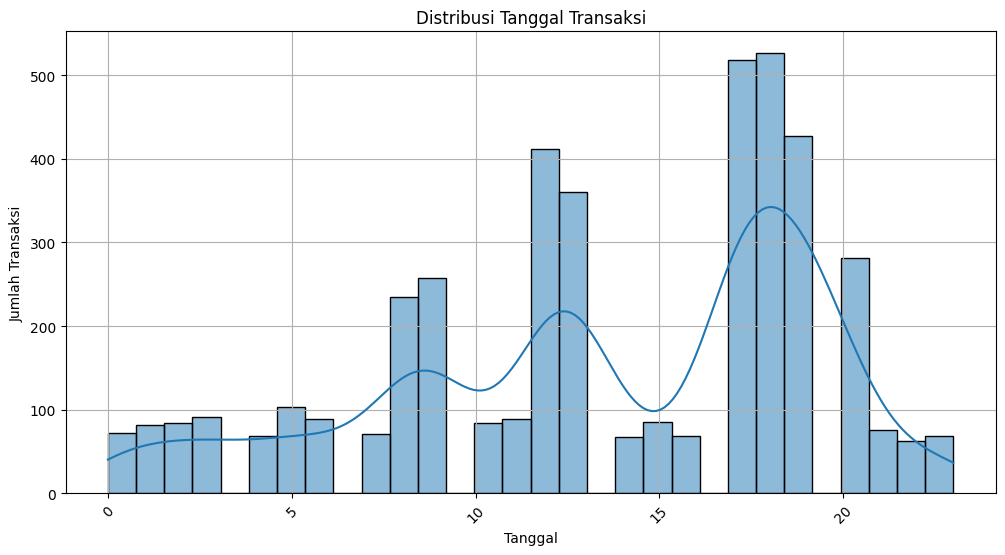

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat DataFrame dari transactions_data
transactions_df = pd.DataFrame(transactions_data)

# Konversi kolom transactionDate ke datetime
transactions_df['transactionDate'] = pd.to_datetime(transactions_df['transactionDate'])
transactions_df['hours'] = transactions_df['transactionDate'].dt.hour
# Plot distribusi tanggal transaksi
plt.figure(figsize=(12, 6))
sns.histplot(transactions_df['hours'], bins=30, kde=True)

plt.title('Distribusi Tanggal Transaksi')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [ ]:
transactions_df['hours'].value_counts()

,count
hours,
18,526
17,518
19,427
12,412
13,360
20,281
9,258
8,235
5,103


In [ ]:
transaction_details_df

,transactionDetailId,transactionId,productId,variantId,quantity,subtotal,createdAt,updatedAt
0,1,1,208,208,1,40960,2024-12-29 12:50:24,2025-03-18 03:12:59.157525
1,2,2,219,219,2,13142,2024-11-19 09:18:52,2025-03-18 03:12:59.164150
2,3,2,214,214,2,44186,2024-11-19 09:18:52,2025-03-18 03:12:59.167239
3,4,3,216,216,2,2412,2025-03-05 20:23:16,2025-03-18 03:12:59.184852
4,5,4,221,221,2,5566,2025-03-01 19:27:03,2025-03-18 03:12:59.190708
...,...,...,...,...,...,...,...,...
7747,7748,3852,213,213,1,15280,2025-01-01 20:35:14,2025-03-18 03:13:29.799714
7748,7749,3852,219,219,1,6571,2025-01-01 20:35:14,2025-03-18 03:13:29.802583
7749,7750,3853,217,217,3,47982,2024-12-28 13:51:43,2025-03-18 03:13:29.807431
7750,7751,3853,219,219,1,6571,2024-12-28 13:51:43,2025-03-18 03:13:29.809220


In [ ]:
transactions_df['userId'].value_counts()

,count
userId,
73,1028
151,982
126,834
147,584


### User Activity

In [ ]:
actions = [
    'Login', 'Logout', 'Tambah Produk', 'Edit Produk', 'Checkout',
    'cancel order', 'update profile', 'Transaksi'
]

In [ ]:
def generate_activity_users(store_users_df, num_records=100):
    activity_data = []

    for i in range(num_records):
        store_user = store_users_df.sample(n=1).iloc[0]
        user_id = store_user['userId']
        store_id = store_user['storeId']

        action = random.choice(actions)

        action_time = fake.date_time_between(start_date="-30d", end_date="now")

        activity_data.append({
            'userActivityId': i + 1,
            'userId': user_id,
            'storeId': store_id,
            'action': action,
            'actionTime': action_time
        })
    return activity_data

In [ ]:
activity_data = generate_activity_users(store_users_df, num_records=100)
activity_df = pd.DataFrame(activity_data)
activity_df.to_csv('user_activity.csv', index=False)

### Store Bill

In [ ]:
bills = [
    'listrik', 'air', 'pajak', 'es batu', 'hutang piutang', 'perawatan alat',
    'biaya sewa', 'ganti lampu', 'beli meja'
]

statuses = [
    'PAID', 'UNPAID'
]

def generate_store_bills(stores_data):
    store_bills_data = []
    store_bill_id = 1

    for store in stores_data:
        store_id = store['storeId']
        num_bills = random.randint(2, 5)

        for _ in range(num_bills):
            bill_name = random.choice(bills)
            status = random.choice(statuses)
            on_date = datetime.now() - timedelta(days=random.randint(0, 30))

            store_bills_data.append({
                'storeBillsId': store_bill_id,
                'storeId': store_id,
                'name': bill_name,
                'status': status,
                "onDate": on_date.strftime("%Y-%m-%d %H:%M:%S"),
                "createdAt": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                "updatedAt": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
            })
            store_bill_id += 1
    return store_bills_data

In [ ]:
store_bills_data = generate_store_bills(stores_data)
store_bills_df = pd.DataFrame(store_bills_data)
store_bills_df.to_csv('store_bills.csv', index=False)

In [ ]:
store_bills_df

,storeBillsId,storeId,name,status,onDate,createdAt,updatedAt
0,1,1,beli meja,PAID,2025-02-27 02:21:01,2025-03-17 02:21:01,2025-03-17 02:21:01
1,2,1,hutang piutang,UNPAID,2025-02-19 02:21:01,2025-03-17 02:21:01,2025-03-17 02:21:01
2,3,1,hutang piutang,UNPAID,2025-03-12 02:21:01,2025-03-17 02:21:01,2025-03-17 02:21:01
3,4,1,listrik,UNPAID,2025-02-23 02:21:01,2025-03-17 02:21:01,2025-03-17 02:21:01
4,5,1,biaya sewa,UNPAID,2025-03-04 02:21:01,2025-03-17 02:21:01,2025-03-17 02:21:01
...,...,...,...,...,...,...,...
109,110,29,pajak,PAID,2025-03-15 02:21:01,2025-03-17 02:21:01,2025-03-17 02:21:01
110,111,29,perawatan alat,PAID,2025-02-27 02:21:01,2025-03-17 02:21:01,2025-03-17 02:21:01
111,112,30,ganti lampu,PAID,2025-03-15 02:21:01,2025-03-17 02:21:01,2025-03-17 02:21:01
112,113,30,ganti lampu,PAID,2025-03-17 02:21:01,2025-03-17 02:21:01,2025-03-17 02:21:01


### Supplier

In [ ]:
def generate_suppliers(num_supplier=20):
    suppliers_data = []
    supplier_id = 1

    for _ in range(num_supplier):
        suppliers_data.append({
            'supplierId': supplier_id,
            'name': fake.company(),
            'phoneNumber': fake.phone_number(),
            'email': fake.email(),
            'address': fake.address(),
            'createdAt': fake.date_time_this_decade(),
            'updatedAt': fake.date_time_this_decade()
        })
        supplier_id += 1
    return suppliers_data

In [ ]:
suppliers_data = generate_suppliers()
suppliers_df = pd.DataFrame(suppliers_data)
suppliers_df.to_csv('suppliers.csv', index=False)

In [ ]:
suppliers_df

,supplierId,name,phoneNumber,email,address,createdAt,updatedAt
0,1,PD Mansur Tbk,+62 (370) 787-6420,simonlaksita@example.net,"Gg. Wonoayu No. 8\nPekalongan, SG 27922",2023-06-25 14:06:46.296651,2024-10-07 23:09:15.675601
1,2,Perum Novitasari Tbk,+62 (0132) 605-2819,ghaliyatisirait@example.org,"Jalan Kendalsari No. 109\nTual, Nusa Tenggara ...",2023-09-02 02:49:46.298011,2020-05-18 21:40:32.973045
2,3,Perum Hasanah Safitri (Persero) Tbk,+62 (0967) 861-5444,ydongoran@example.com,"Gang Monginsidi No. 7\nMakassar, KU 01360",2024-09-12 11:51:23.453488,2023-09-23 23:50:31.113351
3,4,Perum Nuraini,087 651 8256,fmardhiyah@example.net,"Gang Siliwangi No. 41\nSawahlunto, Kepulauan B...",2022-01-09 08:46:57.608562,2020-07-10 07:41:22.601420
4,5,CV Suryono,+62 (34) 788-9335,lidya97@example.com,Jalan M.H Thamrin No. 6\nKota Administrasi Jak...,2020-02-20 19:34:51.397142,2021-03-15 17:37:11.366702
5,6,Perum Gunarto (Persero) Tbk,(0116) 559 8283,kurniawanhamima@example.net,"Jalan PHH. Mustofa No. 16\nBanjarmasin, Papua ...",2020-11-19 12:31:44.009883,2025-03-11 16:19:22.743886
6,7,Perum Purnawati Maheswara,0870653004,bakidinnasyiah@example.org,"Jl. Suryakencana No. 3\nDenpasar, DKI Jakarta ...",2025-02-22 19:22:14.664218,2024-02-10 16:13:00.001107
7,8,UD Wacana Pudjiastuti,(080) 424 4899,putu77@example.org,"Gg. Moch. Toha No. 358\nDumai, Bengkulu 45902",2023-04-12 19:45:52.208284,2022-01-19 17:12:38.195755
8,9,UD Farida Lailasari,+62-0113-150-5239,samsulmayasari@example.org,"Jalan Monginsidi No. 76\nBalikpapan, Gorontalo...",2024-08-04 12:17:03.152867,2024-05-09 00:06:44.331344
9,10,PT Anggraini,+62 (0111) 372-9898,nasyiahgalang@example.net,"Gang Lembong No. 19\nPalopo, PB 95495",2023-11-10 19:09:24.151867,2022-07-22 15:29:24.166012


### Purchase Orders, Purchase Order Items

In [ ]:
def generate_purchase_orders(suppliers_df, stores_df, products_df, transactions_df, transaction_details_df, start_date, end_date, store_ids=None):
    purchase_orders_data = []
    purchase_order_items_data = []
    warehouse_stocks_data = []
    purchase_order_id = 1
    purchase_order_item_id = 1
    warehouse_stock_id = 1

    # Konversi ke DataFrame jika belum
    suppliers_df = pd.DataFrame(suppliers_df)
    stores_df = pd.DataFrame(stores_df)
    products_df = pd.DataFrame(products_df)
    transactions_df = pd.DataFrame(transactions_df)
    transaction_details_df = pd.DataFrame(transaction_details_df)

    # Filter stores_df jika store_ids diberikan
    if store_ids is not None:
        stores_df = stores_df[stores_df['storeId'].isin(store_ids)]
        if stores_df.empty:
            print(f"Tidak ada toko dengan store_ids={store_ids}")
            return [], [], []

    # Gabungkan transaction_details_df dengan transactions_df untuk mendapatkan storeId
    merged_transactions_df = transaction_details_df.merge(
        transactions_df[['transactionId', 'storeId']],
        on='transactionId',
        how='left'
    )

    # Hitung periode 2 minggu dari start_date sampai end_date
    current_date = start_date
    two_weeks = timedelta(days=14)

    while current_date < end_date:
        # Filter transaksi dalam periode 2 minggu terakhir
        period_start = current_date - two_weeks
        period_end = current_date
        period_transactions = merged_transactions_df[
            (merged_transactions_df['createdAt'] >= period_start) &
            (merged_transactions_df['createdAt'] < period_end)
        ]

        if period_transactions.empty:
            print(f"Tidak ada transaksi untuk periode {period_start} - {period_end}")
            current_date += two_weeks
            continue

        # Kelompokkan transaksi berdasarkan storeId dan productId
        transaction_summary = period_transactions.groupby(['storeId', 'productId']).agg({
            'quantity': 'sum'
        }).reset_index()

        # Iterasi melalui setiap toko
        for _, store in stores_df.iterrows():
            store_id = store['storeId']

            # Filter produk yang ada di toko ini dari transaksi
            store_transaction_summary = transaction_summary[transaction_summary['storeId'] == store_id]
            if store_transaction_summary.empty:
                print(f"Tidak ada transaksi untuk storeId {store_id} dalam periode ini")
                continue

            # Pilih supplier secara acak
            supplier = suppliers_df.sample(n=1).iloc[0]
            supplier_id = supplier['supplierId']

            # Hitung total amount untuk purchase order
            total_amount = 0

            # Buat purchase order untuk toko ini
            order_date = current_date
            purchase_orders_data.append({
                'purchaseOrderId': purchase_order_id,
                'supplierId': supplier_id,
                'storeId': store_id,
                'totalAmount': 0,  # Akan diupdate setelah menghitung item
                'orderDate': order_date,
                'status': 'SUCCESS',
                'createdAt': order_date,
                'updatedAt': datetime.now()
            })

            # Tambahkan item berdasarkan transaksi
            for _, trans in store_transaction_summary.iterrows():
                product_id = trans['productId']
                total_sold = int(trans['quantity'])

                # Jumlah stok yang dibeli = total terjual + buffer kecil
                quantity_purchased = total_sold + random.randint(0, 5)  # Sesuai transaksi + buffer
                capital_price = products_df[products_df['productId'] == product_id]['basePrice'].iloc[0]
                total_amount += quantity_purchased * capital_price
                expired_date = order_date + timedelta(days=random.randint(365, 730))

                purchase_order_items_data.append({
                    'purchaseOrderItemId': purchase_order_item_id,
                    'purchaseOrderId': purchase_order_id,
                    'productId': product_id,
                    'quantity': quantity_purchased,
                    'capitalPrice': capital_price,
                    'expiredDate': expired_date,
                    'createdAt': order_date,
                    'updatedAt': datetime.now()
                })

                # Stok di warehouse hanya puluhan (10-99), terlepas dari jumlah yang dibeli
                stock_remaining = random.randint(10, 99)  # Sisa stok dalam puluhan
                warehouse_stocks_data.append({
                    'id': warehouse_stock_id,
                    'productId': product_id,
                    'storeId': store_id,
                    'purchaseOrderId': purchase_order_id,
                    'stock': stock_remaining,
                    'supplierId': supplier_id,
                    'createdAt': order_date,
                    'updatedAt': datetime.now()
                })

                purchase_order_item_id += 1
                warehouse_stock_id += 1

            # Update totalAmount di purchase_orders_data
            purchase_orders_data[-1]['totalAmount'] = total_amount
            purchase_order_id += 1
            print(f"Purchase Order {purchase_order_id-1} dibuat untuk storeId {store_id} dengan {len(store_transaction_summary)} item")

        # Tambah 2 minggu untuk periode berikutnya
        current_date += two_weeks

    return purchase_orders_data, purchase_order_items_data, warehouse_stocks_data

In [ ]:
def generate_warehouse_stocks(purchase_order_items_data):
    warehouse_stocks_data = []
    warehouse_stock_id = 1

    for item in purchase_order_items_data:
        warehouse_stocks_data.append({
            'warehouse_stock_id': warehouse_stock_id,
            'product_id': item['product_id'],
            'purchase_order_id': item['purchase_order_id'],
            'stock': item['quantity'],
        })
        warehouse_stock_id += 1

    return warehouse_stocks_data

In [ ]:
selected_store_ids = [21]

purchase_orders_data, purchase_order_items_data, warehouse_stocks_data = generate_purchase_orders(
    suppliers_df, stores_df, products_df, transactions_df, transaction_details_df, start_date, end_date, store_ids=selected_store_ids
)
# Konversi ke DataFrame dan simpan ke CSV
purchase_orders_df = pd.DataFrame(purchase_orders_data)
purchase_order_items_df = pd.DataFrame(purchase_order_items_data)
warehouse_stocks_df = pd.DataFrame(warehouse_stocks_data)

purchase_orders_df.to_csv('purchase_orders.csv', index=False)
purchase_order_items_df.to_csv('purchase_order_items.csv', index=False)
warehouse_stocks_df.to_csv('warehouse_stocks.csv', index=False)

Tidak ada transaksi untuk periode 2024-08-27 00:00:00 - 2024-09-10 00:00:00
Purchase Order 1 dibuat untuk storeId 21 dengan 8 item
Purchase Order 2 dibuat untuk storeId 21 dengan 8 item
Purchase Order 3 dibuat untuk storeId 21 dengan 8 item
Purchase Order 4 dibuat untuk storeId 21 dengan 8 item
Purchase Order 5 dibuat untuk storeId 21 dengan 8 item
Purchase Order 6 dibuat untuk storeId 21 dengan 8 item
Purchase Order 7 dibuat untuk storeId 21 dengan 8 item
Purchase Order 8 dibuat untuk storeId 21 dengan 8 item
Purchase Order 9 dibuat untuk storeId 21 dengan 8 item
Purchase Order 10 dibuat untuk storeId 21 dengan 8 item
Purchase Order 11 dibuat untuk storeId 21 dengan 8 item
Purchase Order 12 dibuat untuk storeId 21 dengan 8 item


In [ ]:
purchase_orders_df

,purchaseOrderId,supplierId,storeId,totalAmount,orderDate,status,createdAt,updatedAt
0,1,12,21,10652462,2024-09-24,SUCCESS,2024-09-24,2025-03-17 02:21:12.611055
1,2,13,21,22192329,2024-10-08,SUCCESS,2024-10-08,2025-03-17 02:21:12.620252
2,3,13,21,23471154,2024-10-22,SUCCESS,2024-10-22,2025-03-17 02:21:12.628434
3,4,4,21,20344286,2024-11-05,SUCCESS,2024-11-05,2025-03-17 02:21:12.636417
4,5,18,21,19565961,2024-11-19,SUCCESS,2024-11-19,2025-03-17 02:21:12.645935
5,6,1,21,19788729,2024-12-03,SUCCESS,2024-12-03,2025-03-17 02:21:12.653927
6,7,1,21,18971987,2024-12-17,SUCCESS,2024-12-17,2025-03-17 02:21:12.662013
7,8,13,21,24309090,2024-12-31,SUCCESS,2024-12-31,2025-03-17 02:21:12.670297
8,9,11,21,22087299,2025-01-14,SUCCESS,2025-01-14,2025-03-17 02:21:12.678440
9,10,5,21,21033441,2025-01-28,SUCCESS,2025-01-28,2025-03-17 02:21:12.686480


In [ ]:
purchase_order_items_df

,purchaseOrderItemId,purchaseOrderId,productId,quantity,capitalPrice,expiredDate,createdAt,updatedAt
0,1,1,223,80,41490,2026-06-10,2024-09-24,2025-03-17 02:21:12.611645
1,2,1,224,49,2539,2026-06-27,2024-09-24,2025-03-17 02:21:12.612090
2,3,1,225,56,39580,2026-09-06,2024-09-24,2025-03-17 02:21:12.612526
3,4,1,226,86,21431,2026-09-08,2024-09-24,2025-03-17 02:21:12.613122
4,5,1,227,65,8026,2026-07-19,2024-09-24,2025-03-17 02:21:12.613710
...,...,...,...,...,...,...,...,...
91,92,12,226,118,21431,2026-03-10,2025-02-25,2025-03-17 02:21:12.704122
92,93,12,227,95,8026,2026-06-10,2025-02-25,2025-03-17 02:21:12.704532
93,94,12,228,136,18913,2026-12-17,2025-02-25,2025-03-17 02:21:12.704924
94,95,12,229,143,20964,2027-02-12,2025-02-25,2025-03-17 02:21:12.705303


In [ ]:
warehouse_stocks_df

,id,productId,storeId,purchaseOrderId,stock,supplierId,createdAt,updatedAt
0,1,223,21,1,52,12,2024-09-24,2025-03-17 02:21:12.611651
1,2,224,21,1,83,12,2024-09-24,2025-03-17 02:21:12.612094
2,3,225,21,1,63,12,2024-09-24,2025-03-17 02:21:12.612530
3,4,226,21,1,62,12,2024-09-24,2025-03-17 02:21:12.613127
4,5,227,21,1,88,12,2024-09-24,2025-03-17 02:21:12.613715
...,...,...,...,...,...,...,...,...
91,92,226,21,12,67,9,2025-02-25,2025-03-17 02:21:12.704125
92,93,227,21,12,48,9,2025-02-25,2025-03-17 02:21:12.704537
93,94,228,21,12,93,9,2025-02-25,2025-03-17 02:21:12.704928
94,95,229,21,12,64,9,2025-02-25,2025-03-17 02:21:12.705307


In [ ]:
!rm -rf sample_data/

In [ ]:
!zip -r /content/all_files.zip /content/*

updating: content/categories.csv (deflated 51%)
updating: content/customers.csv (deflated 60%)
updating: content/payment_methods.csv (deflated 44%)
updating: content/products.csv (deflated 60%)
updating: content/purchase_order_items.csv (deflated 76%)
updating: content/purchase_orders.csv (deflated 64%)
updating: content/shifts.csv (deflated 73%)
updating: content/store_bills.csv (deflated 89%)
updating: content/stores.csv (deflated 60%)
updating: content/store_users.csv (deflated 56%)
updating: content/suppliers.csv (deflated 46%)
updating: content/tenants.csv (deflated 46%)
updating: content/transaction_details.csv (deflated 79%)
updating: content/transactions.csv (deflated 69%)
updating: content/user_activity.csv (deflated 62%)
updating: content/users.csv (deflated 56%)
updating: content/variant_options.csv (deflated 52%)
updating: content/variant_option_variants.csv (deflated 60%)
updating: content/variants.csv (deflated 59%)
updating: content/variant_types.csv (deflated 44%)
updat